###  <center> Homework 3 - Due 1/8/2018 2359 Hrs

<font color='red'>The purpose of this homework is to enhance your outputs from homework 2 and leave you with a model-ready dataset that we will use for lesson 4.</font>

__Problem:__ You are a data scientist, specialising in safety and compliance, from an large global luxury cruise provider. You are tasked to study historical ship accidents/fatalities to explain what factors contribute to survivability of passengers. Having downloaded a public dataset of the RMS Titanic fatalities, you proceed to inspect the data and found missing values and categorical variables. <br>

Use some of the methods that you have learnt in lesson 2 & 3 to perform an in-depth analysis and come up with smart startegies to treat the cases where there are missing values. <br>

Upon completing the data cleaning process, use the insights derived from  your Exploratory Data Analysis (EDA) to carry out __Feature Engineering__ i.e create your own features. <br>

Finally, carry out __data preprocessing__ to transform your categorical variables into a model friendly shape.

__Hints:__
1. Only use the "train.csv"  data set for this exercise
2. Drop columns that does not have any predictive power such as PassengerId, Name and Ticket (or Cabin)
3. There are a few ways to treat missing data: Drop them or impute them with other values (using a smart strategy) that makes sense
4. Create as many new features as you can. You can consider grouping values in a particular feature. Or you may want to include interaction terms between 2 variables etc.
5. You may want to do one-hot encoding to transform your categorical variables.

__Sample Code (for feature engineering):__

Import relevant libraries, set plotting styles, enable magic command to display plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

%matplotlib inline

Load train dataset

In [3]:
train = pd.read_csv('train.csv')

Explore and Transform __Age__ feature

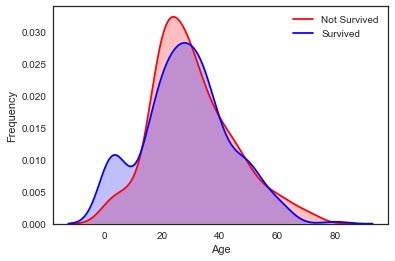

In [4]:
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

Clearly, we can see that kids have a higher chance or survival. So this is a feature that we want to include into our predictive model. In addition, we can group the __Age__ feature into smaller "bins" that makes sense to squeeze out the noise from the signal.

In [5]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


Explore and Transform __Cabin__ feature

In [11]:
train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'] ])

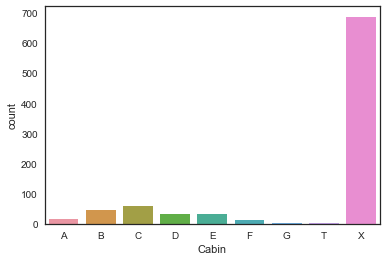

In [12]:
sns.countplot(train["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

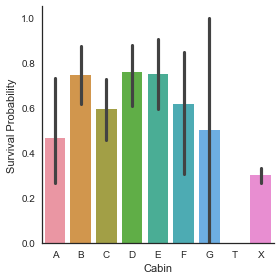

In [14]:
sns.factorplot(y="Survived",x="Cabin",data=train,kind="bar",order=['A','B','C','D','E','F','G','T','X']).set_ylabels("Survival Probability")

### <center> Happy Weekend!